In [1]:
import copy
import os

import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm

from complex_network.materials.dielectric import Dielectric
from complex_network.networks import network_factory, pole_calculator
from complex_network.networks.network_perturbator import NetworkPerturbator
from complex_network.networks.network_spec import NetworkSpec

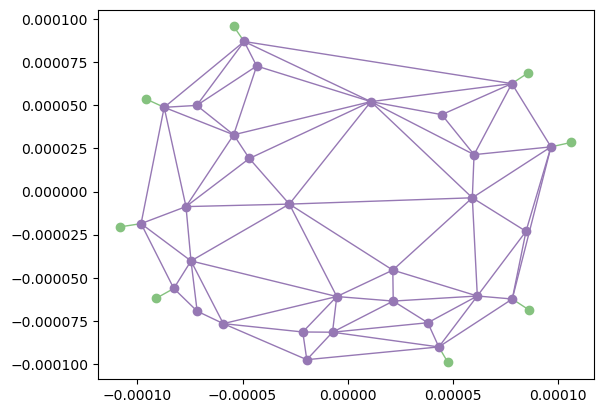

In [2]:
np.random.seed(6)

spec = NetworkSpec(
    network_type="delaunay",
    network_shape="circular",
    num_seed_nodes=0,
    num_internal_nodes=30,
    num_external_nodes=8,
    network_size=100e-6,
    external_size=110e-6,
    external_offset=0.0,
    node_S_mat_type="COE",
    node_S_mat_params={},
    material=Dielectric("glass"),
)

network = network_factory.generate_network(spec)
network.draw()

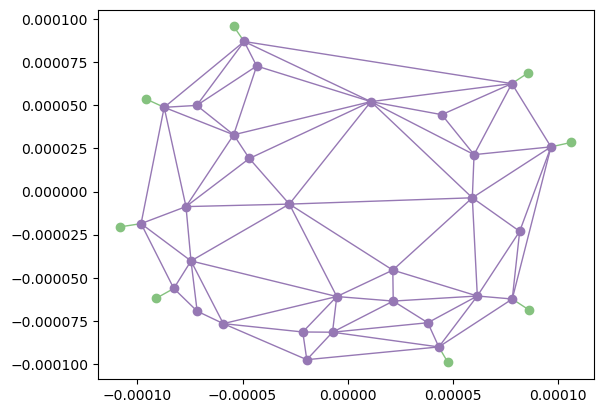

In [3]:
# Move node 27 slightly to make it look a bit nicer
network.translate_node(27, np.array([-3e-6, 0.0]))
network.draw()

In [4]:
# Network size based on internal nodes
min_x = np.min([node.position[0] for node in network.internal_nodes])
max_x = np.max([node.position[0] for node in network.internal_nodes])
min_y = np.min([node.position[1] for node in network.internal_nodes])
max_y = np.max([node.position[1] for node in network.internal_nodes])

width = max_x - min_x
height = max_y - min_y
print(f"Network width: {width/(1e-6):.2f}um")
print(f"Network height: {height/(1e-6):.2f}um")

# Mean link length
mean_length = np.mean([link.length for link in network.internal_links])
print(f"Mean link length: {mean_length/(1e-6):.2f}um")


Network width: 194.84um
Network height: 184.57um
Mean link length: 42.59um


In [5]:
# Broad sweep to find one of the poles
Dlam = 1e-10
lam_centre = 500e-9
lam_min = lam_centre - Dlam
lam_max = lam_centre + Dlam

k0_min = 2 * np.pi / lam_max - 500j
k0_max = 2 * np.pi / lam_min + 0j
num_points = 10**3

x, y, data = pole_calculator.sweep(k0_min, k0_max, num_points, network)

 34%|███▍      | 342/1000 [23:18<44:56,  4.10s/it]  

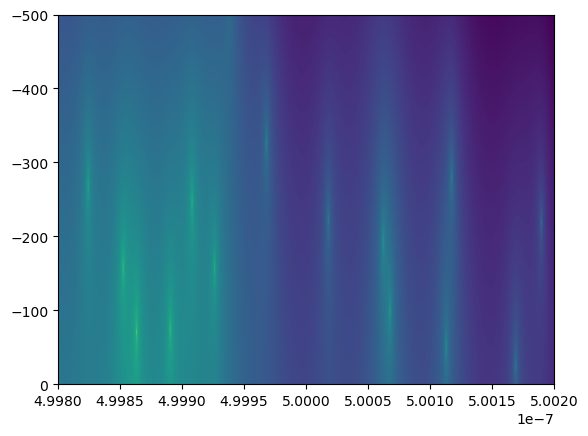

In [ ]:
plot_data = np.flip(data, axis=1)

fig, ax = plt.subplots()
im = ax.imshow(
    -np.log(plot_data),
    extent=(lam_min, lam_max, y[-1,0],y[0,0]),
    aspect="auto",
)